### Decision Trees
Hiring people or not gigen a fabricated dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
# Load data
input_file = 'data/PastHires.csv'
df = pd.read_csv(input_file, header=0)

In [3]:
df.shape

(13, 7)

In [4]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [5]:
df['Level of Education'].unique()

array(['BS', 'MS', 'PhD'], dtype=object)

In [6]:
## Changing values to numerical data
d = {'Y':1, 'N':0}
df['Hired'] = df['Hired'].map(d)
df['Interned'] = df['Interned'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Employed?'] = df['Employed?'].map(d)
# Level of Education
ld = {'BS':0, 'MS':1, 'PhD':2}
df['Level of Education'] = df['Level of Education'].map(ld)
df.head()


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [7]:
# Separate features from target
features = df.drop('Hired', axis=1)
features

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0
5,0,0,0,2,1,1
6,5,1,2,1,0,1
7,3,0,1,0,0,1
8,15,1,5,0,0,0
9,0,0,0,0,0,0


In [8]:
Y = df.Hired.values
x = features

In [9]:
x

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0
5,0,0,0,2,1,1
6,5,1,2,1,0,1
7,3,0,1,0,0,1
8,15,1,5,0,0,0
9,0,0,0,0,0,0


### Decision Tree

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, Y)

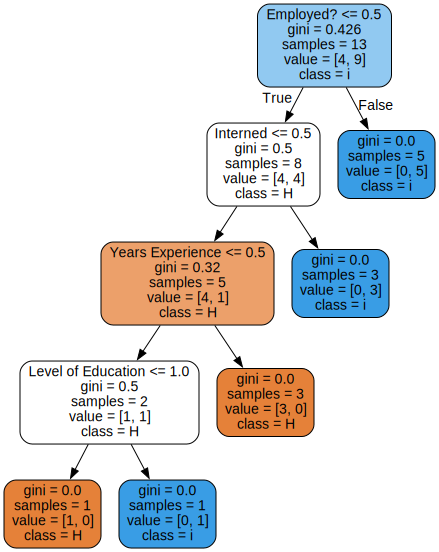

In [11]:
# Displaying the tree graphly
from IPython.display import Image
from six import StringIO
import pydot
from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(
    clf,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=features.columns,
    class_names='Hired',
    max_depth=6
)
grafico = graphviz.Source(dot_data, format='png')
grafico.render("arvore_decisao_regras")
grafico


### Random Forest: Ensemble Learning

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

In [13]:
pipe_steps = [
    ('random_forest',RandomForestClassifier(n_estimators=10))
]
pipe = Pipeline(pipe_steps)
pipe.fit(x, Y)
pipe[:-1].get_feature_names_out(x.columns)

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned'],
      dtype='object')

In [14]:
results = [[10, 1, 4, 0, 0, 0],[10, 0, 4, 0, 0, 0] ]


In [15]:
pipe.predict(results)

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int64)

In [16]:
pipe.score(x, Y)

1.0